# Michaelis-Menten kinetics dynamics

### The Michaelis-Menten kinetics is given by the following system of (coupled) ordinary differential equations (ODEs):

$$
\dot{x}^{(\nu)}_i = -x^{(\nu)}_i + \sum_j w_{i,j} \cdot \frac{x^{(\nu)}_j}{1 + x^{(\nu)}_j}, \quad i, j \in \{1, \dots, N\}
$$

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint  # Import the odeint function from scipy for solving ODEs
from scipy.integrate import solve_ivp  # Import the solve_ivp function from scipy for solving ODEs
import random

In [214]:
# Set up the system of ODEs
def ode_system(x, t, W):  # t must be passed even if not used
    N = len(x)  # Get the number of elements in the state vector
    derivative_vector = np.zeros(N)  # Initialize the derivative vector (set zeros as default)
    for i in range(N):  # Loop over each element in the state vector
        # Compute the sum term for the i-th element according to the formula given in the paper
        sum_term = sum(W[i, j] * (x[j] / (1 + x[j])) for j in range(N) if j != i)  # list comprehension
        derivative_vector[i] = -x[i] + sum_term
    return derivative_vector

In [215]:
# Initialize parameters
N = 200  # Set the number of elements in the state vector

# Create a random initial state vector with values between 0 and 1;
# this is our synthetic data - just randomized data since this way we don't assume anything about the data
vector = np.random.rand(N)

# dist will return true with probability p
dist = lambda p: random.random() < p
avg_deg = 3  # Average degree of the whole network
W = np.zeros((N, N))  # Initialize the weight matrix with zeros
for i in range(N):
    W[i] = [np.random.uniform(0, 2) if (dist(avg_deg / N)) else 0 for _ in range(N)]

# Set up the time points for the simulation
t = np.linspace(0, 10, 1000)

In [216]:
# Run the simulation using the odeint function
result = odeint(ode_system, vector, t, args=(W,))

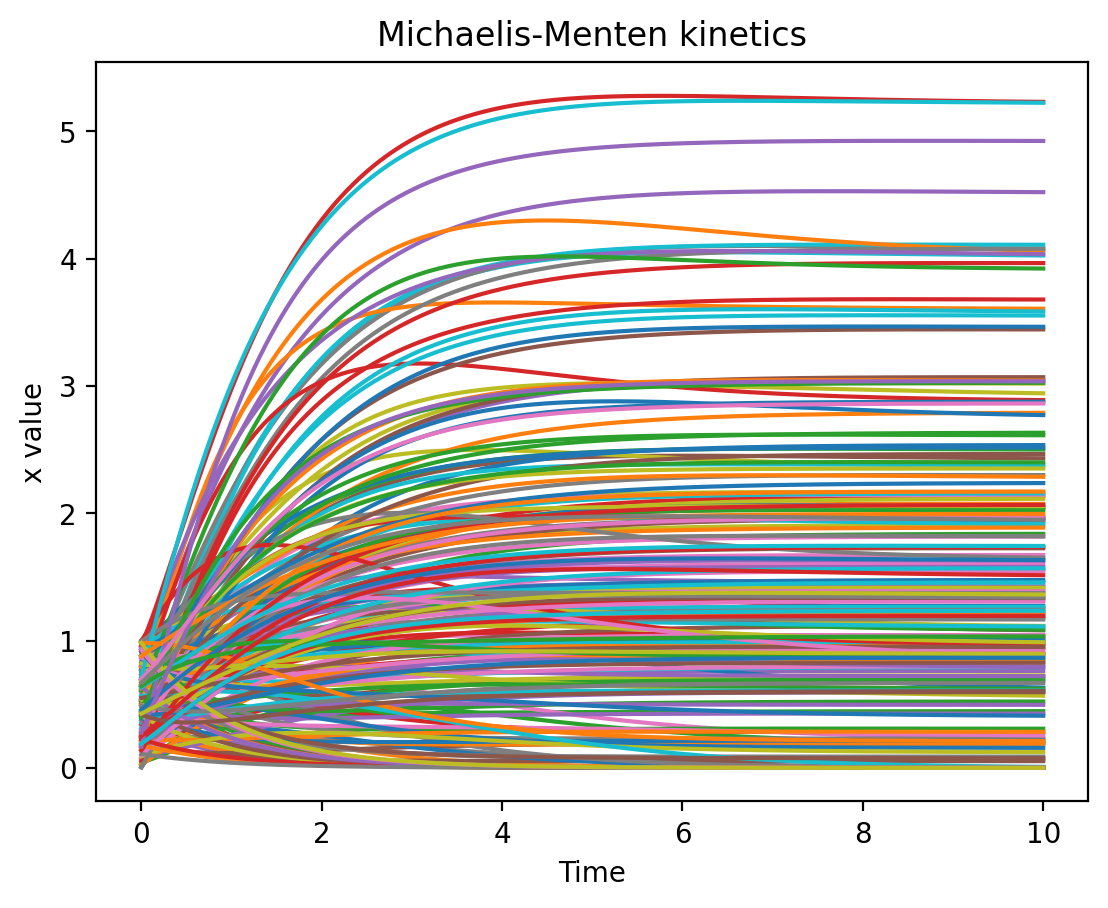

In [217]:
# Plot the results
for i in range(N):
    plt.plot(t, result[:, i])
plt.xlabel('Time')
plt.ylabel('x value')
plt.title('Michaelis-Menten kinetics')
plt.show()